In [1]:

import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:

link = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
page = requests.get(link) 
soup = BeautifulSoup(page.text)
table = soup.find_all('table')[4]

In [3]:

table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
df = pd.DataFrame(res, columns=["Rank", "City", "State", "Col1", "Col2", "Col3", "Sq.Area", "Col4", "population density in Sq Mi", "Population density in Km2", "Location"])
df.head()


,Rank,City,State,Col1,Col2,Col3,Sq.Area,Col4,population density in Sq Mi,Population density in Km2,Location
0,1,New York[d],New York,"8,398,748","8,175,133",+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...
1,2,Los Angeles,California,"3,990,456","3,792,621",+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
2,3,Chicago,Illinois,"2,705,994","2,695,598",+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
3,4,Houston[3],Texas,"2,325,502","2,100,263",+10.72%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...
4,5,Phoenix,Arizona,"1,660,272","1,445,632",+14.85%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...


In [4]:
new= df["Sq.Area"].str.split("s", n=1, expand = True)
new = new[0].str.replace(u'\xa0',u'')
df["Sq.Area"] = new.str.replace(',','')
df["Sq.Area"] = df["Sq.Area"].astype(float)
df["Radius"] = np.sqrt(df["Sq.Area"])



In [5]:
df.drop(columns = ["Rank", "Col1", "Col2", "Col3", "Col4", "Sq.Area", "population density in Sq Mi"], inplace = True)
df


,City,State,Population density in Km2,Location,Radius
0,New York[d],New York,"10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...,17.363755
1,Los Angeles,California,"3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...,21.649480
2,Chicago,Illinois,"4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...,15.076472
3,Houston[3],Texas,"1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...,25.248762
4,Phoenix,Arizona,"1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...,22.750824
5,Philadelphia[e],Pennsylvania,"4,511/km2",40°00′34″N 75°08′00″W﻿ / ﻿40.0094°N 75.1333°W﻿...,11.584472
6,San Antonio,Texas,"1,250/km2",29°28′21″N 98°31′30″W﻿ / ﻿29.4724°N 98.5251°W﻿...,21.470911
7,San Diego,California,"1,670/km2",32°48′55″N 117°08′06″W﻿ / ﻿32.8153°N 117.1350°...,18.033303
8,Dallas,Texas,"1,493/km2",32°47′36″N 96°45′59″W﻿ / ﻿32.7933°N 96.7665°W﻿...,18.463477
9,San Jose,California,"2,231/km2",37°17′48″N 121°49′08″W﻿ / ﻿37.2967°N 121.8189°...,13.322913


In [6]:

df["Location"]= df["Location"].str.split("/", n = 2, expand = True)[1]
df.head()

,City,State,Population density in Km2,Location,Radius
0,New York[d],New York,"10,933/km2",﻿40.6635°N 73.9387°W﻿,17.363755
1,Los Angeles,California,"3,276/km2",﻿34.0194°N 118.4108°W﻿,21.649480
2,Chicago,Illinois,"4,600/km2",﻿41.8376°N 87.6818°W﻿,15.076472
3,Houston[3],Texas,"1,395/km2",﻿29.7866°N 95.3909°W﻿,25.248762
4,Phoenix,Arizona,"1,200/km2",﻿33.5722°N 112.0901°W﻿,22.750824


In [7]:
new = df["Location"].str.split(" ", n = 0, expand = False)
k = df.copy(deep = True)

In [8]:
Latitude = []
Longitude = []
for i in range(len(new)):
    Latitude.append(new[i][1][:-2])
    Longitude.append(new[i][2][:-3]) 

k["Latitude"] = Latitude
k["Longitude"] = Longitude
k["Latitude"] = k["Latitude"].str.replace(u'\ufeff',u'')
k.drop(columns = ["Location"], inplace = True)
k.head()
df = k.copy(deep = True)

In [9]:
df['Longitude'] = -df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)
df['Radius'] = df['Radius']* 1000
df.head()

,City,State,Population density in Km2,Radius,Latitude,Longitude
0,New York[d],New York,"10,933/km2",17363.755354,40.6635,-73.9387
1,Los Angeles,California,"3,276/km2",21649.480363,34.0194,-118.4108
2,Chicago,Illinois,"4,600/km2",15076.471736,41.8376,-87.6818
3,Houston[3],Texas,"1,395/km2",25248.762346,29.7866,-95.3909
4,Phoenix,Arizona,"1,200/km2",22750.824161,33.5722,-112.0901


In [10]:
import urllib.request

In [11]:
link1 = 'https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income'
page1 = requests.get(link1) 
link1 = requests.get('https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income').text
soup1 = BeautifulSoup(link1,'xml')

table = soup1.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df_state = pd.DataFrame(data, columns=["Rank", "Country-equivalent", "State", "Per capita income", "del2", "del3", "Population", "del5"])

df

,City,State,Population density in Km2,Radius,Latitude,Longitude
0,New York[d],New York,"10,933/km2",17363.755354,40.663500,-73.938700
1,Los Angeles,California,"3,276/km2",21649.480363,34.019400,-118.410800
2,Chicago,Illinois,"4,600/km2",15076.471736,41.837600,-87.681800
3,Houston[3],Texas,"1,395/km2",25248.762346,29.786600,-95.390900
4,Phoenix,Arizona,"1,200/km2",22750.824161,33.572200,-112.090100
5,Philadelphia[e],Pennsylvania,"4,511/km2",11584.472366,40.009400,-75.133300
6,San Antonio,Texas,"1,250/km2",21470.910554,29.472400,-98.525100
7,San Diego,California,"1,670/km2",18033.302526,32.815300,-117.135000
8,Dallas,Texas,"1,493/km2",18463.477462,32.793300,-96.766500
9,San Jose,California,"2,231/km2",13322.912594,37.296700,-121.818900


In [12]:
df_state.drop(columns = ['Rank','del2', 'del3', 'del5'], axis = 1, inplace = True)

In [13]:

df_state.head()


,Country-equivalent,State,Per capita income,Population
0,None,None,None,None
1,New York County,New York,"$62,498","1,605,272"
2,Arlington,Virginia,"$62,018","214,861"
3,Falls Church City,Virginia,"$59,088","12,731"
4,Marin,California,"$56,791","254,643"


In [14]:

map_tohood = folium.Map(location=[37.0902,-95.7129], zoom_start=3)
for lat, lng, state, city in zip(df['Latitude'], df['Longitude'], df['State'], df['City']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_tohood)  
    
map_tohood

In [15]:

CLIENT_ID = 'OTUKSBU1K5P45Z1XFUJFT4DWHNJPUUCVG0QCYQKTIYOKPYAP'
CLIENT_SECRET = 'PXUSO14EJKMKBNRAMZC5U15FSCZ41X02R3PEOQUBPGQC4FGH'
VERSION = '20180604'
LIMIT = 20
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OTUKSBU1K5P45Z1XFUJFT4DWHNJPUUCVG0QCYQKTIYOKPYAP
CLIENT_SECRET:PXUSO14EJKMKBNRAMZC5U15FSCZ41X02R3PEOQUBPGQC4FGH


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng,radius in zip(names, latitudes, longitudes,radius):

        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        results = requests.get(url).json()["response"]['groups'][0]['items']
  
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [17]:
df_venues = getNearbyVenues(names = df['City'], latitudes = df['Latitude'],longitudes = df['Longitude'], radius = df['Radius'])
df_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York[d],40.6635,-73.9387,Ix,40.660844,-73.961344,Café
1,New York[d],40.6635,-73.9387,Brooklyn Botanic Garden,40.667622,-73.963191,Botanical Garden
2,New York[d],40.6635,-73.9387,Covenhoven,40.675143,-73.960203,Beer Bar
3,New York[d],40.6635,-73.9387,Brooklyn Museum,40.671521,-73.963677,Art Museum
4,New York[d],40.6635,-73.9387,Bar Lunatico,40.683549,-73.934773,Bar


In [18]:
k = df_venues.copy(deep = True)
weights_dict={'Movie Theater':4.5,'Beach':3,'Concert Hall':3.5,'Playground':3.5,'Coffee Shop':4,'Food Court':4.5,'Nightclub':4.5,'Toy / Game Store':4.5,'Theme Park Ride / Attraction':4.5,'Pub':4.5}
data = df_venues['Venue Category']
allVenues = data.astype(str)

In [19]:

weights = []
for i in allVenues:
    if i in weights_dict.keys():
        weights.append(weights_dict[i])
    else :
        weights.append(0)
df_venues['weights'] = weights;
df_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
0,New York[d],40.6635,-73.9387,Ix,40.660844,-73.961344,Café,0.0
1,New York[d],40.6635,-73.9387,Brooklyn Botanic Garden,40.667622,-73.963191,Botanical Garden,0.0
2,New York[d],40.6635,-73.9387,Covenhoven,40.675143,-73.960203,Beer Bar,0.0
3,New York[d],40.6635,-73.9387,Brooklyn Museum,40.671521,-73.963677,Art Museum,0.0
4,New York[d],40.6635,-73.9387,Bar Lunatico,40.683549,-73.934773,Bar,0.0


In [20]:
df_venues.drop(df_venues[df_venues.weights < 1.0].index, inplace=True)
df_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
21,Los Angeles,34.0194,-118.4108,Blue Bottle Coffee,34.027115,-118.387637,Coffee Shop,4.0
30,Los Angeles,34.0194,-118.4108,Blue Bottle Coffee,34.059310,-118.419797,Coffee Shop,4.0
31,Los Angeles,34.0194,-118.4108,Blue Bottle Coffee,33.980027,-118.408020,Coffee Shop,4.0
56,Chicago,41.8376,-87.6818,Sawada Coffee,41.883730,-87.648726,Coffee Shop,4.0
59,Chicago,41.8376,-87.6818,Stan's Donuts & Coffee,41.867516,-87.626402,Coffee Shop,4.0


In [21]:
citywise_venues_weights = df_venues[['City','weights']].copy()
citywise_venues_weights_means = citywise_venues_weights.groupby(['City']).mean()
citywise_venues_weights_means = citywise_venues_weights_means.reset_index(drop=False)
citywise_venues_weights_means.head()

,City,weights
0,Abilene,4.0
1,Alexandria[m],4.0
2,Allen,3.5
3,Allentown,4.5
4,Amarillo,4.0


In [22]:

city_selection = pd.merge(df, citywise_venues_weights_means, on='City')
city_selection = city_selection[['City','Population density in Km2','weights']].copy()
city_selection.head()

,City,Population density in Km2,weights
0,Los Angeles,"3,276/km2",4.00
1,Chicago,"4,600/km2",4.00
2,Houston[3],"1,395/km2",3.75
3,Phoenix,"1,200/km2",4.00
4,Philadelphia[e],"4,511/km2",4.00


In [23]:
k = city_selection.copy(deep = True)
k['Population density in Km2'] = k['Population density in Km2'].str.split("/", n = 0, expand = True)
k['Population density in Km2'] = k['Population density in Km2'].str.replace(',','')
k['Population density in Km2'] = k['Population density in Km2'].astype(float)
city_selection = k.copy(deep = True)
city_selection.head()

,City,Population density in Km2,weights
0,Los Angeles,3276.0,4.00
1,Chicago,4600.0,4.00
2,Houston[3],1395.0,3.75
3,Phoenix,1200.0,4.00
4,Philadelphia[e],4511.0,4.00


In [24]:
from sklearn import preprocessing
column_names_to_normalize = ['Population density in Km2', 'weights']
x = city_selection[column_names_to_normalize].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
city_selection[column_names_to_normalize] = pd.DataFrame(x_scaled)
city_selection.head()

,City,Population density in Km2,weights
0,Los Angeles,0.470174,0.666667
1,Chicago,0.664224,0.666667
2,Houston[3],0.194489,0.500000
3,Phoenix,0.165909,0.666667
4,Philadelphia[e],0.651180,0.666667


In [25]:
city_selection['sum'] = city_selection['Population density in Km2'] + city_selection['weights']
row_num = city_selection['sum'].argmin()
city_name = city_selection['City'].iloc[row_num]
city_name

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


'Provo'

In [26]:
row = df.loc[df['City']== city_name].index[0]
state_name = df['State'].iloc[row]
state_name

'Utah'

In [27]:
p_row = df_state.loc[df_state['State'] == state_name].index[0]
per_capital_income = df_state['Per capita income'].iloc[p_row]
print("Per capita income of is :", per_capital_income)

Per capita income of is : $42,462


In [28]:
lat_newJercy = df['Latitude'].iloc[row]
long_newJercy = df['Longitude'].iloc[row]
print(lat_newJercy, long_newJercy)

40.2453 -111.6448


In [29]:
def getNearbyVenues1(name, latitudes, longitudes, radius):
    
    LIMIT = 150       
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitudes, 
            longitudes, 
            radius, 
            LIMIT)

    results = requests.get(url).json()["response"]['groups'][0]['items']
    venues_list=[]
    venues_list.append([(name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],v['venue']['categories'][0]['name'])for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 'Latitude', 'Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category']
    return(nearby_venues)

new_jersey_venues = getNearbyVenues1(name = 'Provo', latitudes = lat_newJercy ,longitudes = long_newJercy, radius = 2500)
new_jersey_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Provo,38.3539,-121.9728,SLAB pizza,40.244419,-111.647487,Pizza Place
1,Provo,38.3539,-121.9728,BYU Creamery,40.250085,-111.643375,American Restaurant
2,Provo,38.3539,-121.9728,BYU Museum of Art,40.250707,-111.647915,Art Gallery
3,Provo,38.3539,-121.9728,Harris Fine Arts Center,40.250039,-111.647952,College Theater
4,Provo,38.3539,-121.9728,Chick-fil-A,40.248242,-111.647629,Fast Food Restaurant


In [30]:
venues_in_newjersey = new_jersey_venues.copy(deep = True)
venues_in_newjersey.shape

(100, 7)

In [31]:
k = new_jersey_venues.copy(deep = True)
new_weightage_dict= {'Coffee Shop' : 3, 
'Caribbean Restaurant':3,
'Distillery':2,
'Fish & Chips Shop':3,
'Science Museum':3,
'Latin American Restaurant':4,
'Restaurant':5,
'State / Provincial Park':1,
'Diner':1,
'Supermarket':1,
'Bar':1,
'Jazz Club':1,
'Golf Course':3,
'Park':2,
'Cajun / Creole Restaurant':2,
'Bakery':2,
'Go Kart Track':3,
'Taco Place':3,
'Hot Dog Joint':2,
'Food Truck':3,
'Beer Garden':3,
'Boutique':4,
'Café':5,
'Bagel Shop':1,
'Record Shop':1,
'Bakery':1,
'Pizza Place':1,
'Ramen Restaurant':1,
'Wine Bar':3,
'Middle Eastern Restaurant':2,
'French Restaurant':2,
'Theater':2,
'Lounge':3,
'Wine Shop':3,
'Cocktail Bar':2,
'New American Restaurant':3,
'Residential Building (Apartment / Condo)':3,
'Pool':4,
'Burger Joint':5,
'Cheese Shop':1,
'Coffee Shop':1,
'Bagel Shop':1,
'Vietnamese Restaurant':1,
'Portuguese Restaurant':1,
'Ice Cream Shop':3,
'Italian Restaurant':2,
'Gym':2,
'Farmers Market':2,
'Bar':3,
'Pizza Place':3,
'Bakery':2,
'Bookstore':3,
'Bar':3,
'Farmers Market':4,
'Asian Restaurant':5,
'Tea Room':1,
'Donut Shop':1,
'Historic Site':1,
'Gym / Fitness Center':1,
'Café':1,
'Mexican Restaurant':3,
'Plaza':2,
'Gay Bar':2,
'Bar':3,
'College Administrative Building':3,
'Mexican Restaurant':2,
'Bakery':3,
'American Restaurant':3,
'American Restaurant':4,
'American Restaurant':5,
'Café':1,
'New American Restaurant':1,
'Chocolate Shop':1,
'Gym':1,
'Grocery Store':1,
'Middle Eastern Restaurant':3,
'American Restaurant':2,
'Frozen Yogurt Shop':2,
'Japanese Restaurant':2,
'Bar':3,
'Liquor Store':3,
'Ice Cream Shop':2,
'Fish Market':3,
'Indie Movie Theater':3,
'Grocery Store':4,
'Modern European Restaurant':5,
'American Restaurant':1,
'Poke Place':1,
'Ramen Restaurant':1,
'Diner':1,
'Brewery':1,
'Burger Joint':3,
'Burger Joint':2,
'Café':2,
'Fried Chicken Joint':2,
'Beer Garden':3,
'Gym / Fitness Center':3,
'Vietnamese Restaurant':2,
'Italian Restaurant':3,
'Pet Store':3}

In [32]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
venues_map = folium.Map(location=[lat_newJercy, long_newJercy], zoom_start=15) 

folium.features.CircleMarker(
    [lat_newJercy, long_newJercy],
    radius=10,
    popup='Jersey city',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

In [42]:
for lat, lng, label in zip(venues_in_newjersey['Venue Latitude'], venues_in_newjersey['Venue Longitude'], venues_in_newjersey['Venue']):
    label=folium.Popup(label,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html = False).add_to(venues_map)
venues_map

In [34]:
allVenuesinCity1 = k['Venue Category']

f_weights1 = []
for i in allVenuesinCity1:
    if i in new_weightage_dict.keys():
        f_weights1.append(new_weightage_dict[i])
    else :
        f_weights1.append(0)
k['weights'] = f_weights1;
k.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
0,Provo,38.3539,-121.9728,SLAB pizza,40.244419,-111.647487,Pizza Place,3
1,Provo,38.3539,-121.9728,BYU Creamery,40.250085,-111.643375,American Restaurant,1
2,Provo,38.3539,-121.9728,BYU Museum of Art,40.250707,-111.647915,Art Gallery,0
3,Provo,38.3539,-121.9728,Harris Fine Arts Center,40.250039,-111.647952,College Theater,0
4,Provo,38.3539,-121.9728,Chick-fil-A,40.248242,-111.647629,Fast Food Restaurant,0


In [40]:
newframe = k[['City','Venue Category','weights']].copy()
newframe = k.groupby(['Venue Category']).mean()
newframe.drop(columns = ["Latitude", "Longitude"], inplace = True)
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
clmns = ['weights','Venue Latitude', 'Venue Longitude']
df_tr_std = stats.zscore(newframe[clmns])
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_
newframe['clusters'] = labels
clmns.extend(['clusters'])
kframe = newframe[clmns].groupby(['Venue Category']).mean()
kframe = kframe.reset_index(drop = False)

In [37]:
finalWeight = kframe.groupby(['clusters']).mean()
finalWeight

,weights,Venue Latitude,Venue Longitude
clusters,,,
0,0.333333,40.238346,-111.650751
1,0.157895,40.252692,-111.659948
2,3.052632,40.241645,-111.659667


In [38]:
lat1 = 40.245517
long1 = -111.645255

In [39]:
final_map = folium.Map(location=[lat1, long1], zoom_start=15)

folium.features.CircleMarker(
    [lat1, long1],
    radius=50,
    popup='Arena location',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(final_map)
final_map

# Report

 USA is diverse and multicultural. It provides a lot of business opportunities and business friendly environment. It is a global hub of business and commerce.  Any new business venture or expansion needs to be analyzed carefully. The insight derived from the analysis will give a good understanding of business environment which help in strategically targeting the market. The objective is to find a place to start indoor-sports arena in the best neighborhood in the USA. It would be dependent on the following variables:
   
<ol>
<li>Per Capita Income</li>
<li>Population of locality</li>
<li>Areans in the given neighborhood </li>
</ol>

The following points are needed for the location of the arena:
<ol>
<li>Place to start the business</li>
<li>Target customers</li>
<li>Per capita income of the given location </li>
</ol>

## Data
The data will be used as follows: Use Foursquare and geopy to find the best neighborhood. Data will be searched in open data sources if available. A best city would be selected on variables like Population density, per capita income, number of areans. After determining the city, the best neighborhood  would be selected.The objective is to locate and recommend to the management which neighborhood in a city of USA will be best choice to start an indoor-sports arena. The Management also expects to understand the rationale of the recommendations made.

## Tools Needed:
<ol>
<li>Four square API</li>
<li>List of United states cities by population(Wikipedia)</li>
<li>List of United states counties by per capita income(Wikipedia)</li>
<li>IBM Watson account for Jupyter </li>
</ol>

Some Notes about "Foursquare": https://foursquare.com/
Foursquare is a local search-and-discovery service mobile app which provides search results for its users (Wikipedia).
Founded: New York City, New York, U.S
Users: 60 million
Date launched: March 11, 2009
Employees: Over 200
Founders: Dennis Crowley, Naveen Selvadurai
Owner: Foursquare Labs, Inc


## Approach to the problem
<ol>
<li>The Foursquare API is then used to get the venues in each city of United States</li>
<li>The Wikipedia page (https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population) was scraped using the BeautifulSoup library to build a pandas dataframe listing the cities, states, coordinates, area and population density. Dataframe was cleaned by dropping rows which were not needed and processed.</li>
<li>The Wikipedia page (https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income) was scraped using the BeautifulSoup library to build a pandas dataframe listing the cities, states and percapita income. Dataframe was cleaned by dropping rows which were not needed and processed. </li>
<li>The city is decided using the algorithm, then we use Four Square API to get the venues for that city and assign weights to each category</li>
<li> Here we cluster neighborhoods via K-means clustering method K means to cluster the venues based on the category and get the coordinates of the cluster that has maximum weight and is location to steup sports arena.</li>
</ol>

# Result
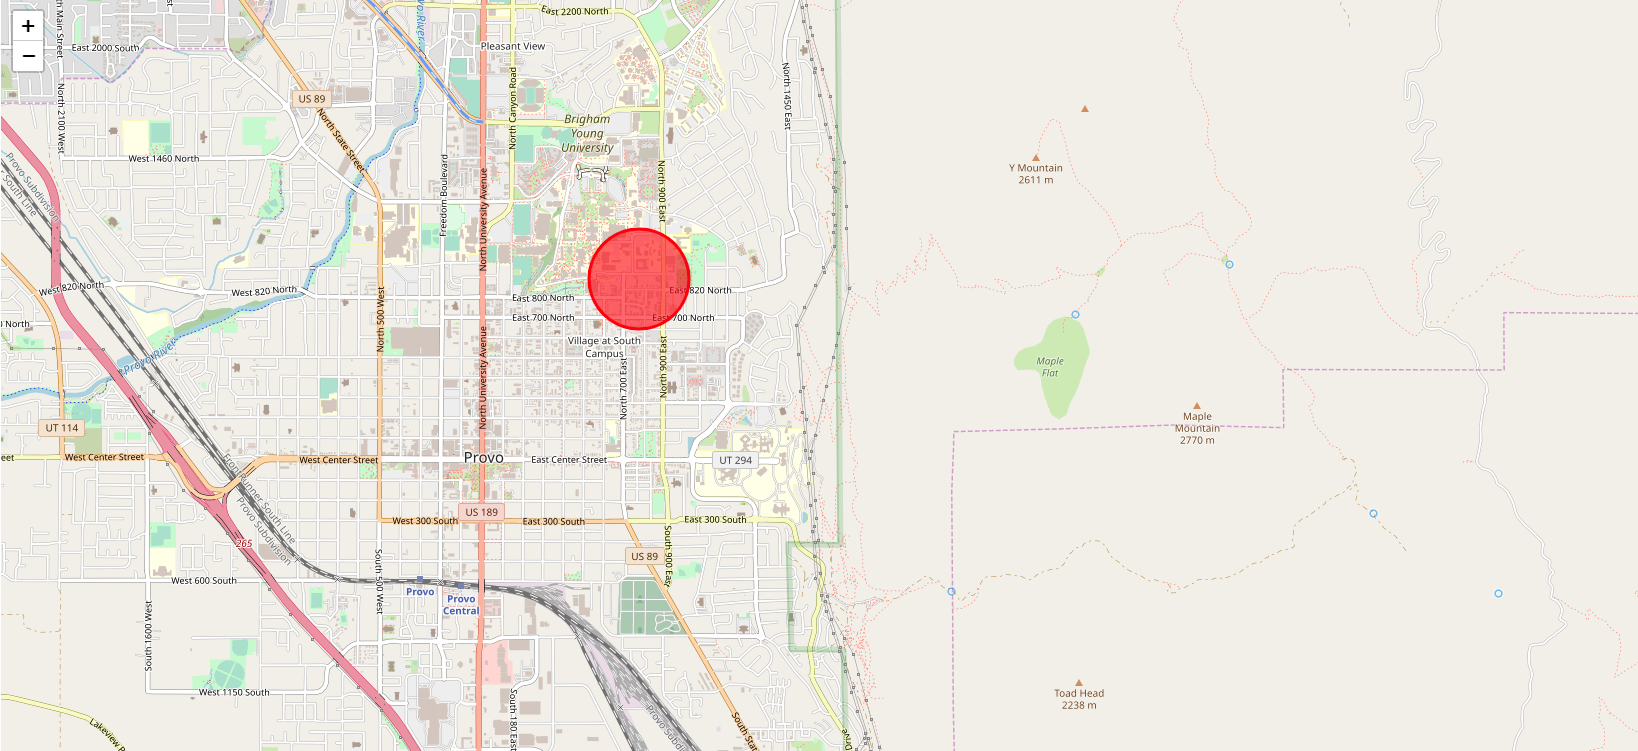